![WordCloud](./img/wordcloud.png)

# Lernmodul zur Verarbeitung und Analyse von Textdaten

Die Verarbeitung von menschlicher Sprache (Natural Language Processing, NLP) gilt als Voraussetzung für eine erfolgreiche Mensch-Maschine-Kommunikation. Zusätzlich kann sie dabei helfen eine vom Mensch unternommene Textanalyse zu unterstützen. Handelt es sich bei diesem Kommentar um unerwünschte Inhalte? Verbreitet dieser Beitrag Falschinformatione? Und welche Meinung will der Verfasser mit dieser Rezension zum Ausdruck bringen?

Im folgenden Lernmodul sollen mithilfe computergestützter Methoden eine Antwort auf solche Problemstellungen gefunden werden. Im Zuge der Sentiment Analysis wird versucht die Intention hinter einem Textbeitrag zu quantifizieren um bspw. zwischen einer negativen und einer positiven Aussage zu unterscheiden. Diese Unterscheidung übernimmt ein Modell (hier: Klassifikator), welches auf Basis eines Vokabulars (hier: Labels) eine Vorhersage (hier: Stimmung) über vorliegende Textbeiträge (hier: Tweets) trifft.

Dabei durchläuft das Lernmodul die drei Domänen *Daten*, *Modell* und *Verwendung*, wie die folgende Abbildung verdeutlicht:

![Pipeline](./img/flow.png)

**Übersicht über die Lerninhalte:**

1. [Einführung](#einführung)
    1. [Motivation](#motivation)
    2. [Voraussetzungen](#voraussetzungen)
2. [Daten](#daten)
    1. [Textdaten beschaffen](#beschaffen)
    2. [Textdaten erkunden](#erkunden)
    3. [Textdaten aufbereiten](#aufbereiten)
        1. [Zeichen bereinigen](#zeichen-bereinigen)
        2. [Wörter bereinigen](#wörter-bereinigen)
        3. [Tweets bereinigen](#tweets-bereinigen)
3. [Modell](#modell)
    1. [Textdaten einbetten](#einbetten)
        1. [Vokabular](#vokabular)
        2. [Label](#label)
        3. [Vektorisierung](#vectorization)
        4. [Features](#features)
    2. [Textdaten klassifizieren](#klassifizieren)
        1. [Überwachte Klassifikation](#überwachte-klassifikation)
        2. [Unüberwachte Klassifikation](#unüberwachte-klassifikation)
4. [Verwendung](#verwendung)
    1. [Vorhersage](#vorhersage)
        1. [Überwachte Klassifikation](#überwachte-klassifikation-2)
        2. [Unüberwachte Klassifikation](#unüberwachte-klassifikation-2)
5. [Abschluss](#abschluss)

**Lernziele:**

Die Teilnehmer lernen in der [Datendomäne](#daten) Textdaten in roher Form Schritt für Schritt in kontextbezogene Daten für eine Textanalyse zu transformieren. Daraufhin bewegen sich die Teilnehmer in der [Modelldomäne](#modell), in der sie die Daten in das Modell einbetten und mittels zweier unterschiedlicher Algorithmen klassifizieren. Last but not least werden die entstandenen Klassifikatoren in der [Verwendungsdomäne](#verwendung) für eine Vorhersage der Stimmung gebraucht.

**Voraussetzungen:**

- [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas)

**Setup für die Aufgabenüberprüfung:**

In [1]:
from taskreview.learningModule import LearningModule
texte_lm = LearningModule('data/lernmodul_texte.db')

<div style="background-color: #150458; padding: 5px;"></div>

## 1. <a id='einführung'>Einführung</a>

### 1.1 <a id='motivation'>Motivation</a>

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von der Bild- auf die Textebene, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analysis)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Dieses Lernmodul beschäftigt sich mit der ersten Problemstellung, also der Texterkennung, im besonderen mit der Unterscheidung verschiedener Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten sind und erkannt werden müssen. Auch könnte man ein Stimmungsbild der Gesellschaft über die Auswertung von Beiträgen auf Twitter betrachten.

### 1.2 <a id='voraussetzungen'>Voraussetzungen</a>

Dieses Lernmodul nimmt sich [NumPy](https://numpy.org/) für numerische Berechnungen, [Pandas](https://pandas.pydata.org/) zur Datenverarbeitung und [PyPlot](https://matplotlib.org/api/pyplot_api.html) zur Datenvisualisierung zur Hilfe. Die folgende Zelle importiert benötigte Abhängigkeiten:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Außerdem werden die folgenden Systemkomponenten zur Hife genommen:

In [3]:
import glob

<div style="background-color: #150458; padding: 5px;"></div>

## 2. <a id='daten'>Daten</a>

In der Datendomäne beschaffen wir uns zunächst einen Datensatz, welcher aus vielen Beispielen besteht, der die Grundgesamtheit an Daten bildet. Ein Beispiel umfasst dabei mindestens ein, wenn nicht sogar mehrere Merkmale. Ein Merkmal wird dabei durch einen numerischen oder symbolischen Wert verkörpert, der in unserem Fall bspw. ein Text sein kann. Im weiteren Verlauf werden die beschafften Daten begutachtet und auf Basis dessen bereinigt.

Welche Schritte ein Tweet in der Datendomäne durchläuft verdeutlicht die folgende Abbildung:

![Daten](./img/data_flow.png)

### 2.1 <a id='beschaffen'>Textdaten beschaffen</a>

Wo findet man in der heutigen Zeit aktuelle Daten, welche eine eigene Meinung enthalten? Auf dem Kurznachrichtendienst Twitter. Da aktuelle Daten von Twitter nicht automatisch mit klassifizierenden Daten angereichert werden, benötigt ihre Analyse einen gewissen Mehraufwand. Überwachtes Lernen auf einem aufbereiteten Datensatz aus bekannter Ein- und Ausgabe ist in unserem Fall erstmal so nicht möglich, da wir es mit aktuellen Daten zu tun haben, die erst aufbereitet werden müssen.

Im Ordner `data/` finden sich einige komprimierte Daten im JSON-Format, welche wir zunächst mithilfe von Pandas einlesen und im DataFrame `twitter` hinterlegen.

In [4]:
twitter = None
for file in glob.glob('./data/tweets/*.gz'):
    json = pd.read_json(file, compression='gzip')
    twitter = pd.concat([twitter, json[:500]]) # Take only 5k tweets per file

### 2.2 <a id='erkunden'>Textdaten erkunden</a>

Wie im [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas) kennengelernt, lässt sich über die `head()` Funktionalität der Kopf des Datensatzes betrachten. Wie schaut dieser aus?

In [5]:
twitter.head()

,twista,type,id,user,created_at,recorded_at,source,retweets,favourites,lang,...,name,screen_name,location,description,url,verified,followers,friends,listed,statuses
0,0.3.4b1,reply,1245112617968033792,3.792278e+09,2020-03-31 22:15:55+00:00,2020-03-31 22:16:09.670982+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3.4b1,reply,1245112620740296704,1.181766e+18,2020-03-31 22:15:56+00:00,2020-03-31 22:16:09.673858+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3.4b1,reply,1245112625412923392,1.189159e+18,2020-03-31 22:15:57+00:00,2020-03-31 22:16:09.684859+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3.4b1,reply,1245081023324528640,4.766604e+07,2020-03-31 20:10:23+00:00,2020-04-01 08:15:03.535422+00:00,"<a href=""http://twitter.com/download/iphone"" r...",7.0,65,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3.4b1,reply,1245112639988076544,2.809609e+09,2020-03-31 22:16:01+00:00,2020-03-31 22:16:09.692649+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Leider liefert die `head()` Funktionalität nicht die Größe des Datensatzes zurück. Wie viele Beispiele sind in ihm enthalten?

In [6]:
texte_lm.show_task(1)

Output()

Output()

Output()

In [7]:
twitter.shape[0]

1000

Wie viele Werte liegen pro Beispiel vor? Aus wie vielen Merkmalen besteht der Datensatz?

In [8]:
texte_lm.show_task(2)

Output()

Output()

Output()

In [9]:
twitter.shape[1]

26

Mal sehen, wie die Merkmale heißen.

In [10]:
twitter.columns

Index(['twista', 'type', 'id', 'user', 'created_at', 'recorded_at', 'source',
       'retweets', 'favourites', 'lang', 'hashtags', 'urls', 'mentions',
       'mentioned_ids', 'text', 'refers_to', 'name', 'screen_name', 'location',
       'description', 'url', 'verified', 'followers', 'friends', 'listed',
       'statuses'],
      dtype='object')

Das Merkmal _created_at_ scheint den Zeitpunkt des Tweets zu beinhalten. Welche Monate haben wir erwischt?

Text(0.5, 0, '2020')

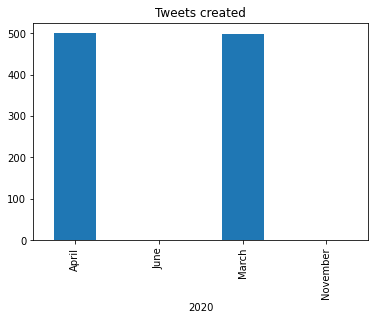

In [11]:
ax = twitter['created_at'].groupby(twitter['created_at'].dt.month_name()).count().plot(kind='bar', title='Tweets created', x='Month')
ax.set_xlabel('2020')

Das Merkmal _lang_ schauen wir uns als nächstes an. Welche Sprachen sind vertreten?

In [12]:
twitter['lang'].unique()

array(['de', 'en', 'pt', 'es'], dtype=object)

Wir behalten lediglich die deutschen Inhalte...

In [13]:
twitter = twitter.drop(twitter[twitter.lang != 'de'].index).reset_index(drop=True)

Das Merkmal _text_ scheint die gewünschten Tweets zu enthalten. Wir extrahieren dieses Merkmal vom DataFrame `twitter` in eine DataSeries `tweets`.

In [14]:
tweets = twitter['text']
tweets.head()

0    @artelle22 Diese Nächte, wo man bis um 2 Uhr m...
1                           @astefanibays abner e sthe
2                   @durstige_waemby War schön mit dir
3     niemand hat a ahnung, aber jeder weiß es besser.
4                          @xXskiller20Xx Z u  s p ä t
Name: text, dtype: object

Beim Extrahieren der Tweets werden ausnahmslos alle Beispiele überführt. Sind unsere Daten nun vollständig, oder gibt es womöglich Tweets ohne Textinhalt, die uns in der folgenden Aufbereitung Probleme bereiten?

In [15]:
texte_lm.show_task(3)

Output()

Output()

Output()

In [16]:
tweets.isna().unique()

array([False,  True])

Fehlende Werte können von den folgenden Schritten nicht verarbeitet werden, sodass wir sie entfernen müssen.

In [17]:
tweets = tweets.dropna()

Bevor es an die Aufbereitung der Daten geht, behalten wir lieber eine Kopie, auf die wir im Falle des Falles zurückgreifen können.

In [18]:
tweets_copy = tweets.replace(regex={r'\n' :  ' '})

### 2.3 <a id='aufbereiten'>Textdaten aufbereiten</a>

#### 2.3.1 <a id='zeichen-bereinigen'>Zeichen bereinigen</a>

Schauen wir uns das erste Beispiel an. Mit welchem Befehl kommen wir zum ersten Tweet?

In [19]:
texte_lm.show_task(4)

Output()

Output()

Output()

In [20]:
tweets.iloc[27]

'@TANZVERBOTcf Hab absolut affig geguckt nachdem ich n Snap bekommen hatte und du rum gebrüllt hast "EY DER BEKOMMT FRISCHE NUDES"😂 https://t.co/xyh2ZHHufC'

In [21]:
tweets_copy = tweets

Leider enthalten Tweets allerhand Symbole, die wir gesondert behandeln müssen. Dazu zählen insbesondere:

* Emojis
* Satzzeichen
* Spezielle Sonderzeichen wie _@user_ und _#hashtag_
* URLs wie _https://_

Daher werden wir zunächst alle Symbole entfernen, die weder dem Alphabet angehören, noch spezielle Sonderzeichen wie _@_ und _#_ verkörpern. Welcher reguläre Ausdruck kommt dafür in Frage?

In [22]:
texte_lm.show_task(5)

Output()

Output()

Output()

In [23]:
expression = '[^a-zA-ZäöüßÄÖU@#\s]'
tweets = tweets.replace(regex={expression : ''})
tweets.iloc[27]

'@TANZVERBOTcf Hab absolut affig geguckt nachdem ich n Snap bekommen hatte und du rum gebrüllt hast EY DER BEKOMMT FRISCHE NUDES httpstcoxyhZHHufC'

Nun können wir Zeichenketten, wie den Nutzer und die URL identifizieren und über die folgenden regulären Ausdrücke entfernen.

In [24]:
expressions = [r'http\S+', # Find URL
               r'@\S+', # Find username
               r'\n'] # Find new line

for expression in expressions:
    tweets = tweets.replace(regex={expression : ''})
    
tweets.iloc[27]

' Hab absolut affig geguckt nachdem ich n Snap bekommen hatte und du rum gebrüllt hast EY DER BEKOMMT FRISCHE NUDES '

#### 2.3.2 <a id='wörter-bereinigen'>Wörter bereinigen</a>

Da unsere Bereinigung im vorherigen Abschnitt nur noch einzelne Wörter und keine Symbole mehr übrig gelassen hat, können wir nun jeden Tweet in seine Bestandteile zerlegen. Dafür zerteilen wir die Zeichenkette anhand des Leerzeichens und erhalten eine Liste von Wörtern pro Tweet. Dieser Schritt geht mit der Funktionsweise eines [Tokenizer](https://de.wikipedia.org/wiki/Tokenizer) einher, welcher lediglich den kompletten Tweet in einzelne Token, also Wörter, zerteilt.

In [25]:
tweets = tweets.str.split()
tweets.iloc[0]

['Diese',
 'Nächte',
 'wo',
 'man',
 'bis',
 'um',
 'Uhr',
 'morgens',
 'im',
 'Bett',
 'liegt',
 'und',
 'über',
 'das',
 'Leben',
 'nachdenkt']

Da wir die einzelnen Wörter getrennt haben, fassen wir alle Wörter aus jedem Tweet zu einer großen Sammlung zusammen, was die `aggregate_words()` Funktion wie folgt umsetzt:

In [26]:
def aggregate_words(tweets):
    """Aggregate words from tweets"""
    
    all_words = []
    for sentence in tweets:
        for word in sentence:
            all_words.append(word.lower())
    return all_words

Wie viele unterschiedliche Wörter sind getweetet worden?

In [27]:
texte_lm.show_task(6)

Output()

Output()

Output()

In [28]:
all_words = aggregate_words(tweets)
len(pd.Series(all_words).unique())

3053

Nachdem wir alle Wörter gesammelt haben, interessieren uns die beliebtesten Wörter aus den Tweets. An dieser Stelle greifen wir auf das Natural Language Toolkit ([NLTK](https://www.nltk.org/)) zurück, welches eine Häufigkeitsverteilung über die `FreqDist()` Funktion wie folgt implementiert.

In [29]:
from nltk.probability import FreqDist
fd = FreqDist(all_words)

Wie lauten also die drei häufigsten Wörter

In [30]:
texte_lm.show_task(7)

Output()

Output()

Output()

In [31]:
fd.most_common(3)

[('die', 192), ('und', 160), ('ich', 155)]

Es ist nicht überraschend, dass sich Artikel, Pronomen oder Konjunktionen als die am häufigsten verwendeten Wörter entpuppen. Schauen wir uns die Häufigkeitsverteilung der 15 beliebtesten Wörter an.

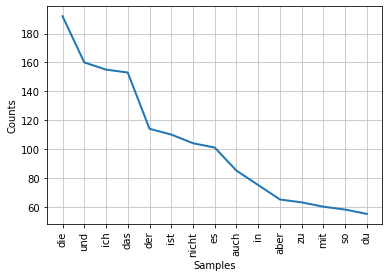

In [32]:
fd.plot(15)

Auch hier scheinen Artikel, Pronomen und Konjunktionen stark vertreten zu sein. Das bringt uns zu der Frage, welche Stimmung diese Wörter eigentlich implizieren?

Solche Wörter, werden im Kontext des NLP als Stoppwörter bezeichnet, da sie zu einer Aussage keinen Inhalt beisteuern, wie es bspw. ein wertendes Adjektiv, wie _gut_ oder _schlecht_ tun würde. Stoppwörter lassen sich daher ähnlich wie das Rauschen aus einer Nachricht (hier: Tweet) entfernen, ohne dass der Inhalt (hier: Stimmung) dieser Nachricht verloren geht.

Wir werden also im folgenden Schritt alle Stoppwörter entfernen. Um sie zu identifizieren, benutzen wir die vorgegebene Textdatei `stop_words.txt` und importieren sie in eine Liste `stop_words`. Hätte man lediglich die meist genutzten Wörter aus der Häufigkeitsverteilung oben genommen, wäre man Gefahr gelaufen, relevante Wörter, wie _schön_, ebenfalls zu entfernen.

In [33]:
stop_words = pd.read_csv('./data/vocab/stop_words.txt', names=['Wort'])
stop_words.head()

,Wort
0,der
1,die
2,das
3,ein
4,eine


Bevor wir alle Stoppwörter unwiederruflich entfernen, fragen wir uns lieber, wie viel Prozent unseres Datensatzes wir dadurch verlieren würden? Dies lässt sich über die `content_loss()` Funktion wie folgt berechnen.

In [34]:
def content_loss(text):
    content = [word for word in text if word not in stop_words['Wort'].values.tolist()]
    return 1.0 - len(content) / len(text)

In [35]:
content_loss(all_words)

0.19525569197758974

Um die Stoppwörter endgültg zu entfernen, werfen wir die `filter_tokens()` Funktion wie folgt an.

In [36]:
def filter_tokens(tweets):
    """Filter tokens in tweets"""
    
    row_list = []
    for row in tweets:
        token_list = []
        for token in row:
            if token.lower() not in stop_words['Wort'].values.tolist():
                token_list.append(token.lower())
        row_list.append(token_list)
    
    return pd.Series(row_list)

In [37]:
tweets = filter_tokens(tweets) # Python list
tweets.head()

0    [diese, nächte, wo, man, bis, um, uhr, morgens...
1                                     [abner, e, sthe]
2                               [war, schön, mit, dir]
3       [niemand, hat, a, ahnung, jeder, weiß, besser]
4                                   [z, u, s, p, ä, t]
dtype: object

Damit ist unsere Sammlung von Wörter nicht mehr aktuell. Der Einfachheit halber sammeln wir sie erneut über die `aggregate_words()` Funktion.

In [38]:
all_words = aggregate_words(tweets)

Welche Ausgabe kann bei erneutem Aufruf der `content_loss()` Funktion erwartet werden?

In [39]:
texte_lm.show_task(8)

Output()

Output()

Output()

In [40]:
content_loss(all_words)

0.0

Welche Wörter werden wohl mit Ausnahme der Stoppwörter am häufigsten benutzt? Alternativ zur bereits bekannten Häufigkeitsverteilung lassen sich im Kontext des NLP sog. Schlagwortwolken erst)ellen. Dazu nutzen wir die `WordCloud()` Funktion wie folgt.

In [41]:
from wordcloud import WordCloud
wc = WordCloud()

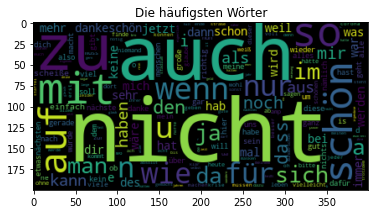

In [42]:
plt.imshow(wc.generate_from_frequencies(FreqDist(all_words)), interpolation="bilinear")
plt.title('Die häufigsten Wörter')
plt.show()

#### 2.3.3 <a id='tweets-bereinigen'>Tweets bereinigen</a>

Da uns der vergangene Abschnitt einige Wörter gekostet hat, wollen wir nun die Tweets identifizieren, die zu wenig oder vielleicht sogar zu viele Wörter enthalten. Beide Extrema sind für die weiterführende Analyse nicht zu gebrauchen. Daher berechnen wir im folgenden die Länge eines Tweets. Wie viele Wörter besitzt der kürzeste Tweet?

In [43]:
texte_lm.show_task(9)

Output()

Output()

Output()

In [44]:
tweets_length = [len(tweet) for tweet in tweets]
np.min(tweets_length)

1

Hoffentlich handelt es sich um einen Ausreißer. Das verifizieren wir wiederum mit einer Häufigkeitsverteilung. Dieses Mal aber als einfaches Histogramm über die `plot_tweet_length_distribution()` Funktion wie folgt.

In [45]:
def plot_tweet_length_distribution(tweets_length):
    """Count tokens per tweet and plot their length distribution."""

    y, x, _ = plt.hist(tweets_length, np.max(tweets_length))
    plt.xlabel('Words per tweet')
    plt.ylabel('Amount of tweets')
    plt.title('Tweet length distribution')
    plt.plot(x[np.where(y == y.max())], y.max(), 'ro') 
    plt.legend(np.round(x[np.where(y == y.max())]))
    plt.show()

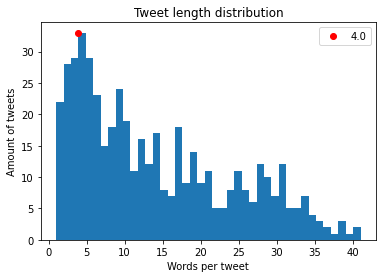

In [46]:
plot_tweet_length_distribution(tweets_length)

Die meisten Tweets scheinen nach Entfernen der Stoppwörter nur noch vier Wörter lang zu sein. Wir verwerfen alle Tweets die _4_ oder weniger Wörter besitzen über die `drop_tweets()` Funktion wie folgt.

In [47]:
def drop_tweets(tweets):
    """Drop tweets"""
    
    row_list = []
    for row in tweets:
        if len(row) > 4:
            row_list.append(row)
    
    return pd.Series(row_list)

In [48]:
# tweets = drop_tweets(tweets) # Does not preserve index
tweets = tweets[tweets.map(len) > 4 ] # Preserve index

In [49]:
tweets.size

377

Von den anfänglich 10k Tweets bleibt gut 4k übrig, die wir in die nun folgende Modelldomäne mitnehmen.

## 3. <a id='modell'>Modell</a>

In der Modelldomäne betten wir die bereinigten Daten zunächst auf Basis eines Vokabulars in ein Modell ein. Das Vokabular dient dabei als Look-up (LUT) für einen Tweet. Welche weiteren Schritte ein Tweet in der Modelldomäne durchläuft, bevor er die letztendlich klassifiziert wird, verrät die folgende Abbildung:

![Model](./img/model_flow.png)

### 3.1 <a id='einbetten'>Textdaten einbetten</a>

Da unsere bereinigten Daten weiterhin in symbolischer Form vorliegen, benötigen wir als nächchstes eine Überführung der Daten in eine Form, die von unserem finalen Modell (hier: Klassifikator) verstanden wird. Man spricht in diesem Zusammenhang vom [Embedding](https://en.wikipedia.org/wiki/Word_embedding) der Wörter.

Es gibt viele komplizierte Verfahren, um das symbolische Wort auf einen numerischen Wert abzubilden, welche in diesem Lernmodul nicht näher betrachtet werden sollen. In diesem Fall schlagen wir die Wörter einfach in einer Art Vokabular nach, das für jedes Wort einen eigenen Wert besitzt. Wie sieht unser Vokabular nun aus?

#### 3.1.1 <a id='vokabular'>Vokabular</a>

Das Vokabular besteht aus negativ bzw. positiv konnotierten Wörtern der deutschen Sprache. Die Stimmungslage ist im Intervall von `[-1, 1]` bzw. `['negativ', 'positiv']` begrenzt. SSchlagen wir neutrale Wörter, wie _und_ bzw. _oder_ im Vokabular nach, bekommen wir einen Stimmungswert von _0_, also neutral, zurückgegeben.

In [50]:
labels = ['negativ', 'positiv']

Dann schauen wir uns mal die negativen...

In [51]:
negative = pd.read_csv('./data/vocab/negative_words.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Wert', 'Deklination'])
negative['Stimmung'] = 'negativ'
negative.head()

,Wort,Wert,Deklination,Stimmung
0,Abbruch|NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",negativ
1,Abdankung|NN,-0.0048,Abdankungen,negativ
2,Abdämpfung|NN,-0.0048,Abdämpfungen,negativ
3,Abfall|NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",negativ
4,Abfuhr|NN,-0.3367,Abfuhren,negativ


...und die positiven Wörter im Vokabular an:

In [52]:
positive = pd.read_csv('./data/vocab/positive_words.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Wert', 'Deklination'])
positive['Stimmung'] = 'positiv'
positive.head()

,Wort,Wert,Deklination,Stimmung
0,Abschluß|NN,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",positiv
1,Abstimmung|NN,0.004,Abstimmungen,positiv
2,Agilität|NN,0.004,NaN,positiv
3,Aktivität|NN,0.004,Aktivitäten,positiv
4,Aktualisierung|NN,0.004,Aktualisierungen,positiv


Der Spalte _Wort_ scheint der Typ des Wortes angehängt zu sein. Wir führen das negative und das positive Vokabular im DataFrame `vocab` zusammen und trennen das Wort von seinem Typ.

In [53]:
vocab = pd.concat([negative, positive]) # assert positive.size + negative.size == vocab.size
vocab[['Wort', 'Typ']] = vocab['Wort'].str.split('|', 1, expand=True)
vocab.head()

,Wort,Wert,Deklination,Stimmung,Typ
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",negativ,NN
1,Abdankung,-0.0048,Abdankungen,negativ,NN
2,Abdämpfung,-0.0048,Abdämpfungen,negativ,NN
3,Abfall,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",negativ,NN
4,Abfuhr,-0.3367,Abfuhren,negativ,NN


Welche Wort-Typen sind vorhanden?

In [54]:
texte_lm.show_task(10)

Output()

Output()

Output()

In [55]:
vocab['Typ'].unique()

array(['NN', 'VVINF', 'ADJX', 'ADV'], dtype=object)

Wir visualisieren alle negativen Nomen mithilfe der bereits bekannten Schlagwortwolke:

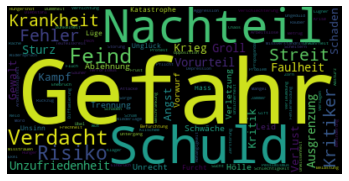

In [56]:
neg = vocab[(vocab['Stimmung'] == 'negativ') & (vocab['Typ'] == 'NN')] # Only negative vocabulary
plt.imshow(wc.generate_from_frequencies(pd.Series(neg.Wert.values * (-100), index=neg.Wort).to_dict()), interpolation="bilinear")
plt.axis('off')
plt.show()

Analog visualisieren wir alle positiven Adjektive in unserem Vokabular.

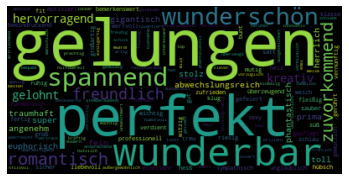

In [57]:
pos = vocab[(vocab['Stimmung'] == 'positiv') & (vocab['Typ'] == 'ADJX')] # Only positive vocabulary
plt.imshow(wc.generate_from_frequencies(pd.Series(pos.Wert.values * (100), index=pos.Wort).to_dict()), interpolation="bilinear")
plt.axis('off')
plt.show()

Ist unser Vokabular eher negativ oder eher positiv?

In [58]:
texte_lm.show_task(11)

Output()

Output()

Output()

In [59]:
vocab.mean()

Wert   -0.053921
dtype: float64

Wie bereits für die Tweets halten wir nach fehlenden Werten Ausschau. In welcher Spalte fehlen Werte?

In [60]:
texte_lm.show_task(12)

Output()

Output()

Output()

In [61]:
vocab.isna().describe()

,Wort,Wert,Deklination,Stimmung,Typ
count,3466,3466,3466,3466,3466
unique,1,1,2,1,1
top,False,False,False,False,False
freq,3466,3466,2659,3466,3466


Anstatt sie zu streichen, werden sie dieses mal mit einer leeren Zeichenkette ersetzt.

In [62]:
vocab = vocab.fillna('')

Für eine unkomplizierte LUT benötigen wir ein Wort pro Zeile. Dies erreichen wir, indem wir die Elemente der Liste in Spalte _Deklinaton_ in eine eigene Reihe überführen.

In [63]:
vocab['Merged'] = vocab['Wort'] + ',' + vocab['Deklination']
vocab['Merged'] = vocab['Merged'].str.split(',')
vocab = vocab.explode('Merged')
vocab = vocab.sort_values('Wort').reset_index(drop=True)
vocab = vocab.rename(columns={'Wort': 'Stamm', 'Merged': 'Wort'})
vocab = vocab.drop(['Deklination'], axis=1)
vocab

,Stamm,Wert,Stimmung,Typ,Wort
0,Abbruch,-0.0048,negativ,NN,Abbruch
1,Abbruch,-0.0048,negativ,NN,Abbruches
2,Abbruch,-0.0048,negativ,NN,Abbrüche
3,Abbruch,-0.0048,negativ,NN,Abbruchs
4,Abbruch,-0.0048,negativ,NN,Abbrüchen
...,...,...,...,...,...
32076,üppig,0.2010,positiv,ADJX,üppigster
32077,üppig,0.2010,positiv,ADJX,üppiges
32078,üppig,0.2010,positiv,ADJX,üppig
32079,üppig,0.2010,positiv,ADJX,üppigsten


Welchen Stimmungswert besitzt das Adjektiv _gut_ im Vokabular.

In [64]:
texte_lm.show_task(13)

Output()

Output()

Output()

In [65]:
vocab.loc[(vocab['Typ'] == 'ADJX') & (vocab['Wort'] == 'gut')]

,Stamm,Wert,Stimmung,Typ,Wort
13862,gut,0.3716,positiv,ADJX,gut


Wie lautet das "schlechteste" Wort im Vokabular?

In [66]:
texte_lm.show_task(14)

Output()

Output()

Output()

In [67]:
vocab.sort_values('Wert').head(3)

,Stamm,Wert,Stimmung,Typ,Wort
1096,Gefahr,-1.0000,negativ,NN,Gefahr
1097,Gefahr,-1.0000,negativ,NN,Gefahren
2219,Schuld,-0.9686,negativ,NN,Schulden


#### 3.1.2 <a id='vectorization'>Vektorisierung</a>

Innerhalb der Vektorisierung überführen wir die symbolischen Textdaten in numerische Werte. Dies geschieht im Normalfall über Häufigkeitsverteilungen. Je öfter ein Wort im Text vorkommt, desto wichtiger scheint es zu sein, was sich in der Vektorisierung wiederspiegelt.

In diesem Fall aber benutzen wir das bekannte Vokabular und überführen jedes einzelne Wort eines Tweets in seinen Stimmungswert. Das Wort _gut_ kriegt dabei den Stimmungswert 0.37 zugewiesen, wie eine vorherige Aufgabe bereits abgefragt hat.

In [68]:
vocab.loc[vocab['Wort'] == 'gut'].Wert

13862    0.3716
Name: Wert, dtype: float64

In [69]:
def vectorize(tweet):
    """Vectorize tweets based on vocabulary"""
            
    vectors = []
    for token in tweet:          
        row = vocab.loc[vocab['Wort'].str.lower() == token]
        if len(row) == 1:
            vectors.append(row.Wert.values[0])

    return vectors

In [70]:
tweets = tweets.to_frame(name='Token')
tweets['Vector'] = tweets['Token'].apply(vectorize)
tweets.head()

,Token,Vector
0,"[diese, nächte, wo, man, bis, um, uhr, morgens...",[]
3,"[niemand, hat, a, ahnung, jeder, weiß, besser]",[0.004]
4,"[z, u, s, p, ä, t]",[]
5,"[i, f, sp, werden, eigenen, geldverschwendung,...",[-0.1953]
6,"[corona, scherzeviel, wichtiger, frage, ob, me...",[0.3822]


Leider ist der Funktionsaufruf (noch) nicht optimiert und benötigt daher seine Zeit...

![Time](https://media.giphy.com/media/tXL4FHPSnVJ0A/giphy.gif)

#### 3.1.2 <a id='label'>Label</a>

Dieser Schritt fügt den Tweets eine Stimmung auf Basis des Vokabulars hinzu. Dabei summieren wir die jeweiligen Stimmungswerte aller im Tweet enthaltenen Wörter und schauen ob sie in Summe negativ oder positiv sind.

In [71]:
def get_labels(tweet):
    """Label tweets according to vocabulary."""
    
    score = np.sum(tweet)
            
    if score > 0.0:
        return 'positiv'
    elif score < 0.0:
        return 'negativ'
    else:
        return 'neutral'

In [72]:
tweets['Label'] = tweets['Vector'].apply(get_labels)
tweets.head()

,Token,Vector,Label
0,"[diese, nächte, wo, man, bis, um, uhr, morgens...",[],neutral
3,"[niemand, hat, a, ahnung, jeder, weiß, besser]",[0.004],positiv
4,"[z, u, s, p, ä, t]",[],neutral
5,"[i, f, sp, werden, eigenen, geldverschwendung,...",[-0.1953],negativ
6,"[corona, scherzeviel, wichtiger, frage, ob, me...",[0.3822],positiv


Welches Label bekommen Tweets, dessen Summe _0_ ist, weil entweder keine Wörter gefunden werden bzw. sich die Stimmungswerte neutralisieren?

In [73]:
texte_lm.show_task(15)

Output()

Output()

Output()

Neutrale Tweets sind für unser Modell nicht relevant und werden verworfen.

In [74]:
tweets = tweets.drop(tweets[tweets['Label'] == 'neutral'].index) # Preserve index
tweets.head()

,Token,Vector,Label
3,"[niemand, hat, a, ahnung, jeder, weiß, besser]",[0.004],positiv
5,"[i, f, sp, werden, eigenen, geldverschwendung,...",[-0.1953],negativ
6,"[corona, scherzeviel, wichtiger, frage, ob, me...",[0.3822],positiv
7,"[okay, nähern, uns, mit, dem, falschen, zeitpu...","[-0.7618, 0.004]",negativ
8,"[hab, ja, nicht, gegenteil, behauptet, nur, bi...","[0.004, 0.3694, -0.2715]",positiv


Wie sieht die Verteilung zwischen negativen und positiven Tweets aus? Ist die Stimmungslage eher negativ oder eher positiv?

In [75]:
texte_lm.show_task(16)

Output()

Output()

Output()

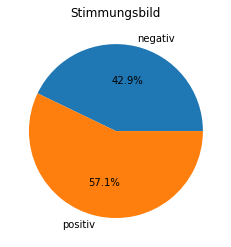

In [76]:
plt.pie([tweets['Label'][tweets['Label'] == 'negativ'].count(), tweets['Label'][tweets['Label'] == 'positiv'].count()], labels=labels, autopct='%1.1f%%')
plt.title('Stimmungsbild')
plt.show()

Natürlich werden nicht immer gleich viele Wörter pro Tweet im Vokabular gefunden. Da unser unüberwachter Klassifikator eine konstante Eingabe benötigt, müssen wir uns auf eine Wortzahl einigen, die vom Modell pro Tweet einbezogen wird. Naheliegend entscheiden wir uns für die im Mittel gefundenen Wörter als `pad_size`...

In [77]:
pad_size = int(np.round(np.mean([len(vector) for vector in tweets['Vector']])))
pad_size

2

...und füllen fehlende Werte mit der `padding()` Funktion wie folgt auf.

In [78]:
def padding(tweet):
    """Pad vectors with zeros at the end."""
       
    return np.pad(tweet[:pad_size], (0, pad_size-len(tweet[:pad_size])))

#### 3.1.4 <a id='features'>Features</a>

Jetzt fehlt nur noch eine Eingabe für unseren überwachten Klassifikator. Da diese auf Features und Labels angewiesen ist, strukturieren wir sie als einfaches Schlüsselwertpaar mit den Wörtern als Schlüssel und der Stimmung als Wert.

In [79]:
def get_features(tweets):
    for tweet in tweets:
        yield dict([(word, True) for word in tweet])

In [80]:
def get_features_for_single_tweet(tweet):
    return dict([(word, True) for word in tweet])

In [81]:
negative_features = get_features(tweets.loc[tweets['Label'] == 'negativ']['Token'])
negative_set = [(tweet_dict, 'negativ') for tweet_dict in negative_features]

positive_features = get_features(tweets.loc[tweets['Label'] == 'positiv']['Token'])
positive_set = [(tweet_dict, 'positiv') for tweet_dict in positive_features]

train_set = negative_set + positive_set

### 3.2 <a id='klassifizieren'>Textdaten klassifizieren</a>

#### 3.2.1 <a id='überwachte-klassifikation'>Überwachte Klassifikation</a>

Mithilfe des [Naive Bayes](https://www.nltk.org/_modules/nltk/classify/naivebayes.html) Algorithmus führen wir eine überwachte Klassifizierung aus.

In [82]:
from nltk import NaiveBayesClassifier

In [83]:
classifier = NaiveBayesClassifier.train(train_set)

Wie sehen die informativsten Wörter aus?

In [84]:
classifier.show_most_informative_features()

Most Informative Features
                     gut = True           positi : negati =      6.3 : 1.0
                   immer = True           negati : positi =      5.5 : 1.0
                   krise = True           negati : positi =      4.9 : 1.0
                 scheiße = True           negati : positi =      4.8 : 1.0
                   allem = True           negati : positi =      4.0 : 1.0
                   fehlt = True           negati : positi =      4.0 : 1.0
                  gleich = True           negati : positi =      4.0 : 1.0
                  meinen = True           negati : positi =      4.0 : 1.0
                  vielen = True           negati : positi =      4.0 : 1.0
                  weiter = True           negati : positi =      4.0 : 1.0


In [85]:
def supervised_classifier(tweets):
    """Supervised classifier"""
    
    print('#\tSoll\tIst\t∆\tTweet')
    
    negative = 0
    positive = 0
    error = 0
    for tweet in tweets.itertuples():
        
        label = tweet.Label
        features = get_features_for_single_tweet(tweet.Token)
        prediction = classifier.classify(features)
            
        if label != prediction: 
            delta = 'X'
            error += 1
        else: 
            delta = ' '
        
        if prediction == 'negativ':
            negative += 1
            
        else:
            positive += 1
            
        print('%i\t%s\t%s\t%s\t%.100s' % (tweet.Index, label, prediction, delta, tweets_copy.iloc[tweet.Index]))
        
    print('\nGenauigkeit:', 1 - error / tweets.shape[0])
    plt.pie([negative, positive], labels=labels, autopct='%1.1f%%')
    plt.title('Überwachte Klassifizierung')

#	Soll	Ist	∆	Tweet
202	positiv	positiv	 	@rakeman Ihr macht da einen klasse Job mit euren Webinaren! Freue mich auf die nächsten!
398	positiv	positiv	 	@ErsguterJoker @NEFFlST00 @schakal2100 @shokata7 Aber mach dir nichts draus King, dafür bist du reic
167	positiv	positiv	 	@JochenBittner Schön noch den letzten Rest der Stammleserschaft der Zeit vergraulen oder was soll di
326	negativ	negativ	 	@electrinchen Hab noch nie nen Ban erlebt bei jemandem. Es verschwinden ja auch einfach mal alle vor
297	negativ	negativ	 	@Velofisch @KoeppelRoger Ich hoffe das du Linker Systemtroll verstehst, dass eine große Wirtschaftsk
186	positiv	positiv	 	@CDU Ich finde es im höchsten Maße verabscheuungswert, wie Laschet und Spahn Parteipolitik auf dem R
421	positiv	positiv	 	@l__marvin__l Willkommen in meinem Leben: mir wird heiß wenn i eif nur atme
268	negativ	negativ	 	@Silke74918142 @DaOilteFritz Lese es jetzt erst, das ist eines der schlimmsten Schicksalschläge die 
103	positiv	positiv	 	@AZeckenbiss

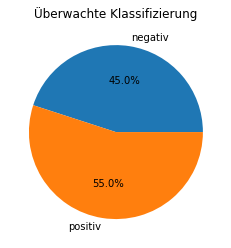

In [86]:
supervised_classifier(tweets.sample(20))

#### 3.2.2 <a id='unüberwachte-klassifikation'>Unüberwachte Klassifikation</a>

Mithilfe von [K-means](https://www.nltk.org/_modules/nltk/cluster/kmeans.html) Clustering führen wir eine unüberwachte Klassifizierung aus.

In [87]:
from nltk.cluster import KMeansClusterer, euclidean_distance

In [88]:
clusterer = KMeansClusterer(2, euclidean_distance, repeats=10, avoid_empty_clusters=True)

In [89]:
clusters = clusterer.cluster(tweets['Vector'].apply(padding), True)

Wo liegen die Mittelpunkte unserer Cluster?

In [90]:
def plot_clusters():
    """Plot clusters"""
    
    means = clusterer.means()
    plt.scatter(means[0], means[0])
    plt.scatter(means[1], means[1])
    plt.legend(['Negativ', 'Positiv'])

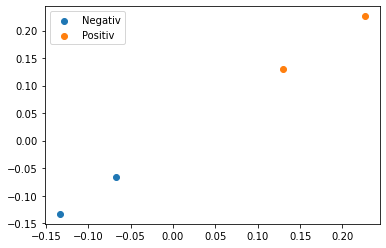

In [91]:
plot_clusters()

In [92]:
def unsupervised_classifier(tweets):
    """Unsupervised classifier"""
    
    print('#\tSoll\tIst\t∆\tTweet')
    
    negative = 0
    positive = 0
    error = 0
    for tweet in tweets.itertuples():
        
        label = tweet.Label
        vector = padding(tweet.Vector)
        prediction = clusterer.classify(vector)
        
        if prediction == 0: 
            cluster = 'negativ'
            negative += 1
            
        else:
            cluster = 'positiv'
            positive += 1
            
        if label != cluster: 
            delta = 'X'
            error += 1
            
        else: delta = ' '
            
        print('%i\t%s\t%s\t%s\t%.60s' % (tweet.Index, label, cluster, delta, tweets_copy.iloc[tweet.Index]))
   
    print('\nGenauigkeit:', 1 - error / tweets.shape[0])
    plt.pie([negative, positive], labels=['negativ', 'positiv'], autopct='%1.1f%%')
    plt.title('Unüberwachte Klassifizierung')

#	Soll	Ist	∆	Tweet
371	positiv	positiv	 	@Dessy1970 Stimmt. Nur werden eben diese Dödel, die absolut 
401	positiv	positiv	 	@FlyingDok Spannend, danke. Man stellt sich als Laie einfach
83	negativ	negativ	 	@phwampfler @martinsteiger In meinem Umfeld muss eine Risiko
146	negativ	negativ	 	@MitschAlexander ....und die CDU wird es irgendwie dann auch
485	negativ	negativ	 	@_is_back_ @caro_h3000 @isabelledaniel Darüber hinaus haben 
443	positiv	negativ	X	@tomas_a_Breivik Is Krankenwagen am Haus vorbeigefahren und 
133	negativ	negativ	 	@AmazonHelp Hab ich gemacht
Aber damit ist der Bildschirm ja
221	positiv	positiv	 	@MailFTN gut das du net lesen kannst da steht nämlich das di
114	positiv	negativ	X	@Kri_Fri @ArminLaschet @welt Ich finde es im höchsten Maße v
66	negativ	negativ	 	@Ale_chioc @NortonImperator @sthgho Ich finde Merz macht in 
127	positiv	positiv	 	@CorinnaFretz @meinbge @schreibtatze @Bundestag @ChangeGER I
141	positiv	positiv	 	@OliverPink1 "Jeder reißt nur sein Maul auf - ab

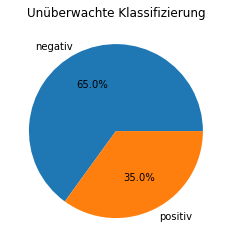

In [93]:
unsupervised_classifier(tweets.sample(20))

<div style="background-color: #150458; padding: 5px;"></div>

## 4. <a id='verwendung'>Verwendung</a>

Welche Schritte ein Tweet innerhalb der Verwendung durchläuft verdeutlicht die folgende Abbildung:

![Model](./img/usage_flow.png)

### 4.1 <a id='vorhersage'>Textdaten vorhersagen</a>

In [94]:
negative = "Was für ein mittelmäßig Lernmodul"
positive = "Was für ein gutes Lernmodul"

In [95]:
def unsupervised_classification(sentence):
    """Helper function for unsupervised classification"""
    
    vector = padding(vectorize(sentence))
    prediction = clusterer.classify(vector)
    
    if prediction == 0: print('negativ')            
    else: print('positiv')

#### 4.1.1 <a id='überwachte-klassifikation-2'>Überwachte Klassifikation</a>

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein schlechtes Lernmodul

In [96]:
classifier.classify(get_features_for_single_tweet(negative.split()))

'positiv'

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein gutes Lernmodul

In [97]:
classifier.classify(get_features_for_single_tweet(positive.split()))

'positiv'

#### <a id='unüberwachte-klassifikation-2'>Unüberwachte Klassifikation</a>

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein schlechtes Lernmodul

In [98]:
unsupervised_classification(negative.split())

negativ


Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein gutes Lernmodul

In [99]:
unsupervised_classification(positive.split())

positiv


<div style="background-color: #150458; padding: 5px;"></div>

## 5. <a id='abschluss'>Abschluss</a>

**Ergebnis:**

Du hast folgende Punktzahl erreicht...

In [100]:
texte_lm.get_num_correct_answered()

0

**Zusammenfassung:**

Das vergangene Lernmodul hat einen Einblick in die Texterkennung als Teilgebiet des _NLP_ gegeben. Im Zuge einer Stimmungsanalyse von aktuellen Beiträgen auf Twitter, haben wir zunächst Rohdaten beschafft und erkundet. Irrelevante Inhalte wurden auf Basis von Sonderzeichen, URL-Schema und der Länge des resultierenden Beitrags, identifiziert und verworfen, sodass die Rohdaten als nächstes in ein Modell eingebettet wurden. Dieses Modell klassifizierte die Daten entweder überwacht oder unüberwacht, was verschiedene Einbettungsschritte hervor zog. Letztendlich konnte sowohl der überwachte als auch der unüberwachte Klassifikator die Stimmung eines Tweets einschätzen und vorhersagen.

**Weiterführende Lernmodule:**

- [Lernmodul zu Datamining mit Scikit Learn](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-scikit)

**Anhang:**

* Lizenz
* Weiterführendes
    * [TextBlob](https://textblob.readthedocs.io/en/dev/)
    * [Word2Vec](https://en.wikipedia.org/wiki/Word2vec)
* Quellen
    * [NLTK Book](https://www.nltk.org/book/)